# **Importar as bibliotecas do python 🐍**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier


# ***Ler o arquivo .csv***
### para o DataFrame df_original

In [3]:
df_original = pd.read_csv('/content/df_limpo.csv')

# **I - Análise Exploratória dos dados**

# ***7 Primeiras linhas do DataFrame***

In [4]:
df_original.head(7)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),2.12,69.4,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),3.71,109.7,7904.25


# ***7 Últimas linhas do DataFrame***

In [5]:
df_original.tail(7)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
7036,9985-MWVIX,Yes,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,2.34,70.15,70.15
7037,9986-BONCE,Yes,Female,0,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),0.71,20.95,85.50
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,1.90,55.15,742.90
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,2.84,85.10,1873.70
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1.55,50.30,92.75
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,2.30,67.85,4627.65
7042,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,1.96,59.00,3707.60


# **Tamanho do DataFrame**
linhas x colunas

In [6]:
print(df_original.shape)

(7043, 22)


# **Resumo do DataFrame**

In [7]:
print(df_original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

# **Mostrar as estatísticas descritivas das colunas numéricas**

In [8]:
print(df_original.describe())

       customer.SeniorCitizen  ...  account.Charges.Total
count             7043.000000  ...            7032.000000
mean                 0.162147  ...            2283.300441
std                  0.368612  ...            2266.771362
min                  0.000000  ...              18.800000
25%                  0.000000  ...             401.450000
50%                  0.000000  ...            1397.475000
75%                  0.000000  ...            3794.737500
max                  1.000000  ...            8684.800000

[8 rows x 5 columns]


# **Listar as colunas/variáveis presentes no DataFrame**

In [9]:
print(df_original.columns)

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')


# **Mostrar 10 linhas aleatórias do DataFrame:**
*Uma demostração da variabilidade dos dados.*

In [10]:
print(df_original.sample(10))

      customerID Churn  ... account.Charges.Monthly  account.Charges.Total
5451  7669-LCRSD    No  ...                   56.30                 628.65
3034  4342-HENTK   Yes  ...                   70.65                 142.35
6515  9244-ZVAPM    No  ...                   45.60                  45.60
6945  9848-JQJTX    No  ...                  100.90                7459.05
4143  5857-TYBCJ    No  ...                   89.20                4040.20
230   0356-OBMAC    No  ...                   99.90                5706.30
1690  2465-BLLEU    No  ...                   19.75                  19.75
5187  7297-DVYGA    No  ...                   19.85                 996.95
2327  3327-YBAKM    No  ...                   96.90                6314.35
5421  7634-HLQJR    No  ...                   20.05                1016.70

[10 rows x 22 columns]


# **II - Limpeza e Tratamento dos Dados no DataFrame**

# **Identificar se tem linhas duplicadas no DataFrame**

In [11]:
Linhas_Duplicadas = df_original.duplicated().sum()
print('Linhas Duplicadas no DataFrame:', Linhas_Duplicadas)

Linhas Duplicadas no DataFrame: 0


# **Identificar se tem valores nulos nas colunas**

In [12]:
print("Contagem de valores nulos por coluna do DataFrame:\n\n")
print(df_original.isnull().sum())

Contagem de valores nulos por coluna do DataFrame:


customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
Total.Day                    11
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


# **Dropar os valores nulos das colunas Total.Day e account.Charges.Total**

In [13]:
df_original = df_original.dropna(subset=['Total.Day', 'account.Charges.Total'])

In [14]:
print("Contagem de valores nulos por coluna do DataFrame:\nSegunda verificação\n")
print(df_original.isnull().sum())

Contagem de valores nulos por coluna do DataFrame:
Segunda verificação

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
Total.Day                    0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


# **Verificar o tipo das colunas no DataFrame**

In [15]:
print(df_original.dtypes)

customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
Total.Day                    float64
account.Charges.Monthly      float64
account.Charges.Total        float64
dtype: object


# **Dropar coluna irrelevante para a análise**

In [16]:
df_original = df_original.drop(columns=['customerID'])
print(df_original.dtypes)

Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
Total.Day                    float64
account.Charges.Monthly      float64
account.Charges.Total        float64
dtype: object


# **Mostra as colunas do DataFrame com até 3 valores únicos**

In [17]:
tamanho_colunas = max(len(coluna) for coluna in df_original.columns)
for coluna in df_original.columns:
    valores_unicos = df_original[coluna].unique()
    if len(valores_unicos) < 4:
         print(f"Coluna '{coluna}'".ljust(tamanho_colunas + 10), f": {valores_unicos}")
         contagem_de_valores = df_original[coluna].value_counts()
         print(contagem_de_valores,'\n\n')



Coluna 'Churn'                      : ['No' 'Yes']
Churn
No     5163
Yes    1869
Name: count, dtype: int64 


Coluna 'customer.gender'            : ['Female' 'Male']
customer.gender
Male      3549
Female    3483
Name: count, dtype: int64 


Coluna 'customer.SeniorCitizen'     : [0 1]
customer.SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64 


Coluna 'customer.Partner'           : ['Yes' 'No']
customer.Partner
No     3639
Yes    3393
Name: count, dtype: int64 


Coluna 'customer.Dependents'        : ['Yes' 'No']
customer.Dependents
No     4933
Yes    2099
Name: count, dtype: int64 


Coluna 'phone.PhoneService'         : ['Yes' 'No']
phone.PhoneService
Yes    6352
No      680
Name: count, dtype: int64 


Coluna 'phone.MultipleLines'        : ['No' 'Yes' 'No phone service']
phone.MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64 


Coluna 'internet.InternetService'   : ['DSL' 'Fiber optic' 'No']
internet.Interne

# **Fazer uma cópia do DataFrame**
comparar os tamanhos do copiado e do *original*

In [18]:
dataframe_copiado = df_original.copy()

In [19]:
print("Tamanho do DataFrame Original: (linhas/colunas)")
print(df_original.shape)
print("Tamanho do DataFrame Copiado: (linhas/colunas)")
print(dataframe_copiado.shape)

Tamanho do DataFrame Original: (linhas/colunas)
(7032, 21)
Tamanho do DataFrame Copiado: (linhas/colunas)
(7032, 21)


# **Fazer a substituição dos dados de** "No internet service" **para** "No" **nas colunas do DataFrame**

In [20]:
colunas_para_ajustar = [
    'internet.OnlineSecurity','internet.OnlineBackup','internet.DeviceProtection',
    'internet.TechSupport','internet.StreamingTV','internet.StreamingMovies'
]
for colunas in colunas_para_ajustar:
    dataframe_copiado[colunas] = dataframe_copiado[colunas].replace('No internet service', 'No')

# **Mostra as colunas do DataFrame com até 3 valores únicos**

In [21]:
tamanho_colunas = max(len(coluna) for coluna in dataframe_copiado.columns)
for coluna in dataframe_copiado.columns:
    valores_unicos = dataframe_copiado[coluna].unique()
    if len(valores_unicos) < 4:
         print(f"Coluna '{coluna}'".ljust(tamanho_colunas + 10), f": {valores_unicos}")
         contagem_de_valores = dataframe_copiado[coluna].value_counts()
         print(contagem_de_valores,'\n\n')

Coluna 'Churn'                      : ['No' 'Yes']
Churn
No     5163
Yes    1869
Name: count, dtype: int64 


Coluna 'customer.gender'            : ['Female' 'Male']
customer.gender
Male      3549
Female    3483
Name: count, dtype: int64 


Coluna 'customer.SeniorCitizen'     : [0 1]
customer.SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64 


Coluna 'customer.Partner'           : ['Yes' 'No']
customer.Partner
No     3639
Yes    3393
Name: count, dtype: int64 


Coluna 'customer.Dependents'        : ['Yes' 'No']
customer.Dependents
No     4933
Yes    2099
Name: count, dtype: int64 


Coluna 'phone.PhoneService'         : ['Yes' 'No']
phone.PhoneService
Yes    6352
No      680
Name: count, dtype: int64 


Coluna 'phone.MultipleLines'        : ['No' 'Yes' 'No phone service']
phone.MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64 


Coluna 'internet.InternetService'   : ['DSL' 'Fiber optic' 'No']
internet.Interne


# **Quantidade de Nulos em "Churn"**
---



In [26]:
# Verificando valores nulos na coluna Churn e removendo-os
print("Valores nulos em 'Churn':", dataframe_copiado['Churn'].isnull().sum())

Valores nulos em 'Churn': 0


# **Fazer o one-hot encoding**

In [22]:

colunas_categoricas = [
       'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'
]

dataframe_codificado = pd.get_dummies(dataframe_copiado, columns=colunas_categoricas, drop_first=True)

# dataframe_pronto_para_usar
dataframe_codificado

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,phone.MultipleLines_Yes,internet.InternetService_Fiber optic,internet.InternetService_No,internet.OnlineSecurity_Yes,internet.OnlineBackup_Yes,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.60,593.30,False,False,True,True,True,False,False,False,False,False,True,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.90,542.40,False,True,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.90,280.85,True,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.00,1237.85,True,True,True,False,True,False,False,True,False,False,True,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.90,267.40,True,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,1.90,55.15,742.90,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True
7039,0,22,2.84,85.10,1873.70,True,True,True,False,True,False,True,True,False,False,False,False,False,False,True,False,False,True,False,True,False
7040,0,2,1.55,50.30,92.75,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True
7041,0,67,2.30,67.85,4627.65,False,True,True,True,True,False,False,False,False,True,False,True,True,False,True,False,True,False,False,False,True


# **Separando Features & Target**

In [34]:
# Separando features e target
X = dataframe_codificado.drop('Churn_Yes', axis=1)
y = dataframe_codificado['Churn_Yes']
print("Shape X:", X.shape)
print("Shape y:", y.shape)

Shape X: (7032, 25)
Shape y: (7032,)


## **Gráficos dos dados**

🤔 Cancelados (Churn Rate): 26.58%


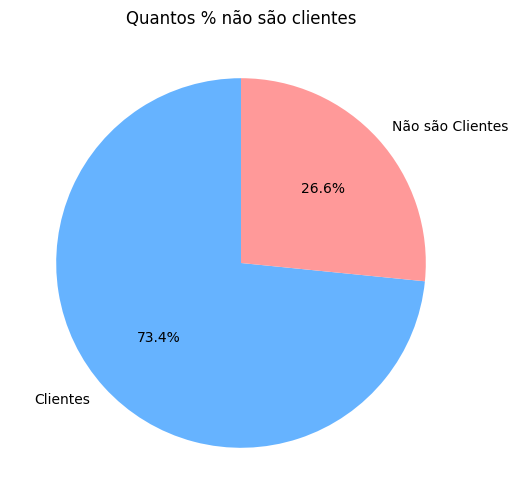

In [40]:
# Taxa de Churn
tot_cli_val = len(dataframe_copiado)
clientes_cancelaram = dataframe_copiado['Churn'].value_counts().get('Yes', 0)
churn_rate = (clientes_cancelaram / tot_cli_val) * 100

print(f"🤔 Cancelados (Churn Rate): {churn_rate:.2f}%")

# Pizza Time!!!
plt.figure(figsize=(6, 6))
dataframe_copiado['Churn'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    labels=['Clientes', 'Não são Clientes'],
    colors=['#66b3ff', '#ff9999']
)
plt.title('Quantos % não são clientes')
plt.ylabel('')
plt.show()

# **Churn por tipo de contrato**

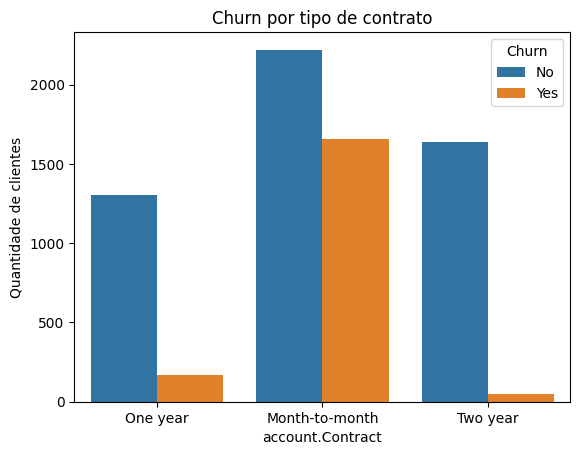

In [77]:
sns.countplot(data=dataframe_copiado, x='account.Contract', hue='Churn')
plt.title('Churn por tipo de contrato')
plt.ylabel('Quantidade de clientes')
plt.show()

# **Churn por Forma de Pagamento**

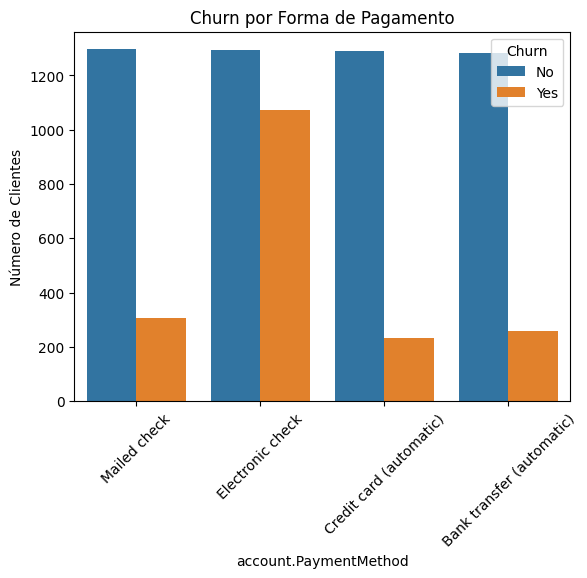

In [79]:
sns.countplot(x='account.PaymentMethod', hue='Churn', data=dataframe_copiado)
plt.title('Churn por Forma de Pagamento')
plt.xticks(rotation=45)
plt.ylabel('Número de Clientes')
plt.show()

# **Box Plot Total de Gastos x Churn**

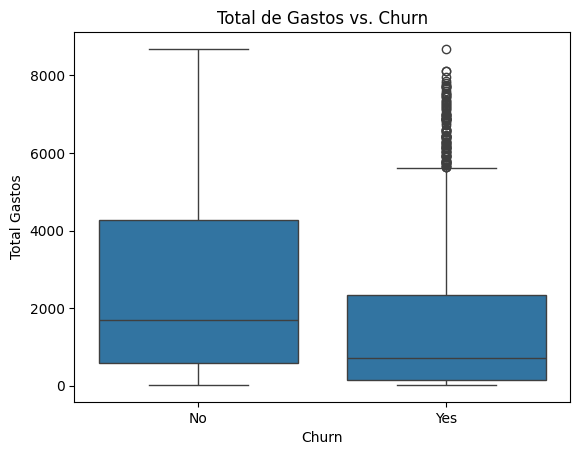

In [84]:
sns.boxplot(x='Churn', y='account.Charges.Total', data=dataframe_copiado)
plt.title('Total de Gastos vs. Churn')
plt.ylabel('Total Gastos')
plt.xlabel('Churn')
plt.show()

## **Analisando a Correlação**

---



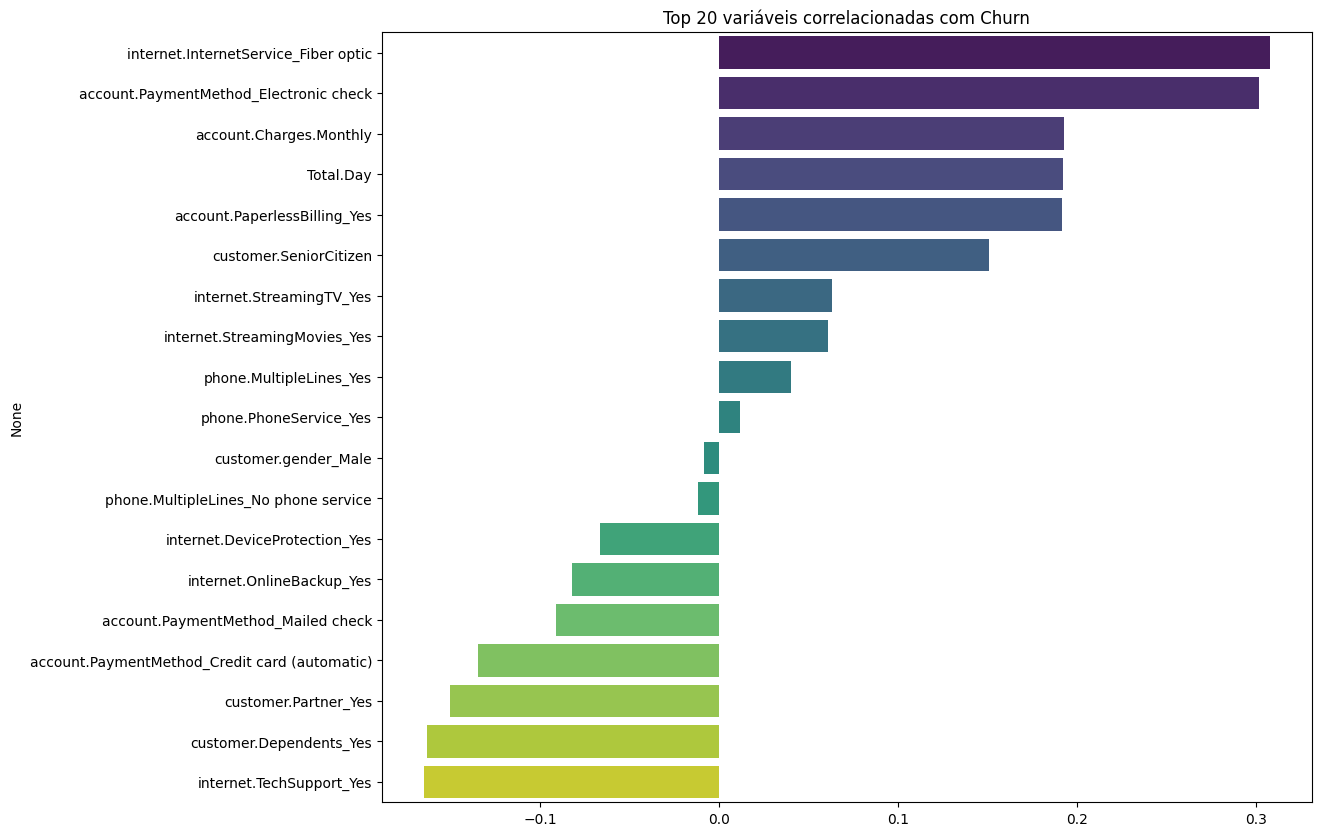

In [45]:
plt.figure(figsize=(12,10))
corr = dataframe_codificado.corr()['Churn_Yes'].sort_values(ascending=False)
sns.barplot(
    x=corr.values[1:20],
    y=corr.index[1:20],
    hue=corr.index[1:20],
    palette="viridis",
    dodge=False,
    legend=False
)
plt.title("Top 20 variáveis correlacionadas com Churn")
plt.show()

# **Correlação entre as variáveis**


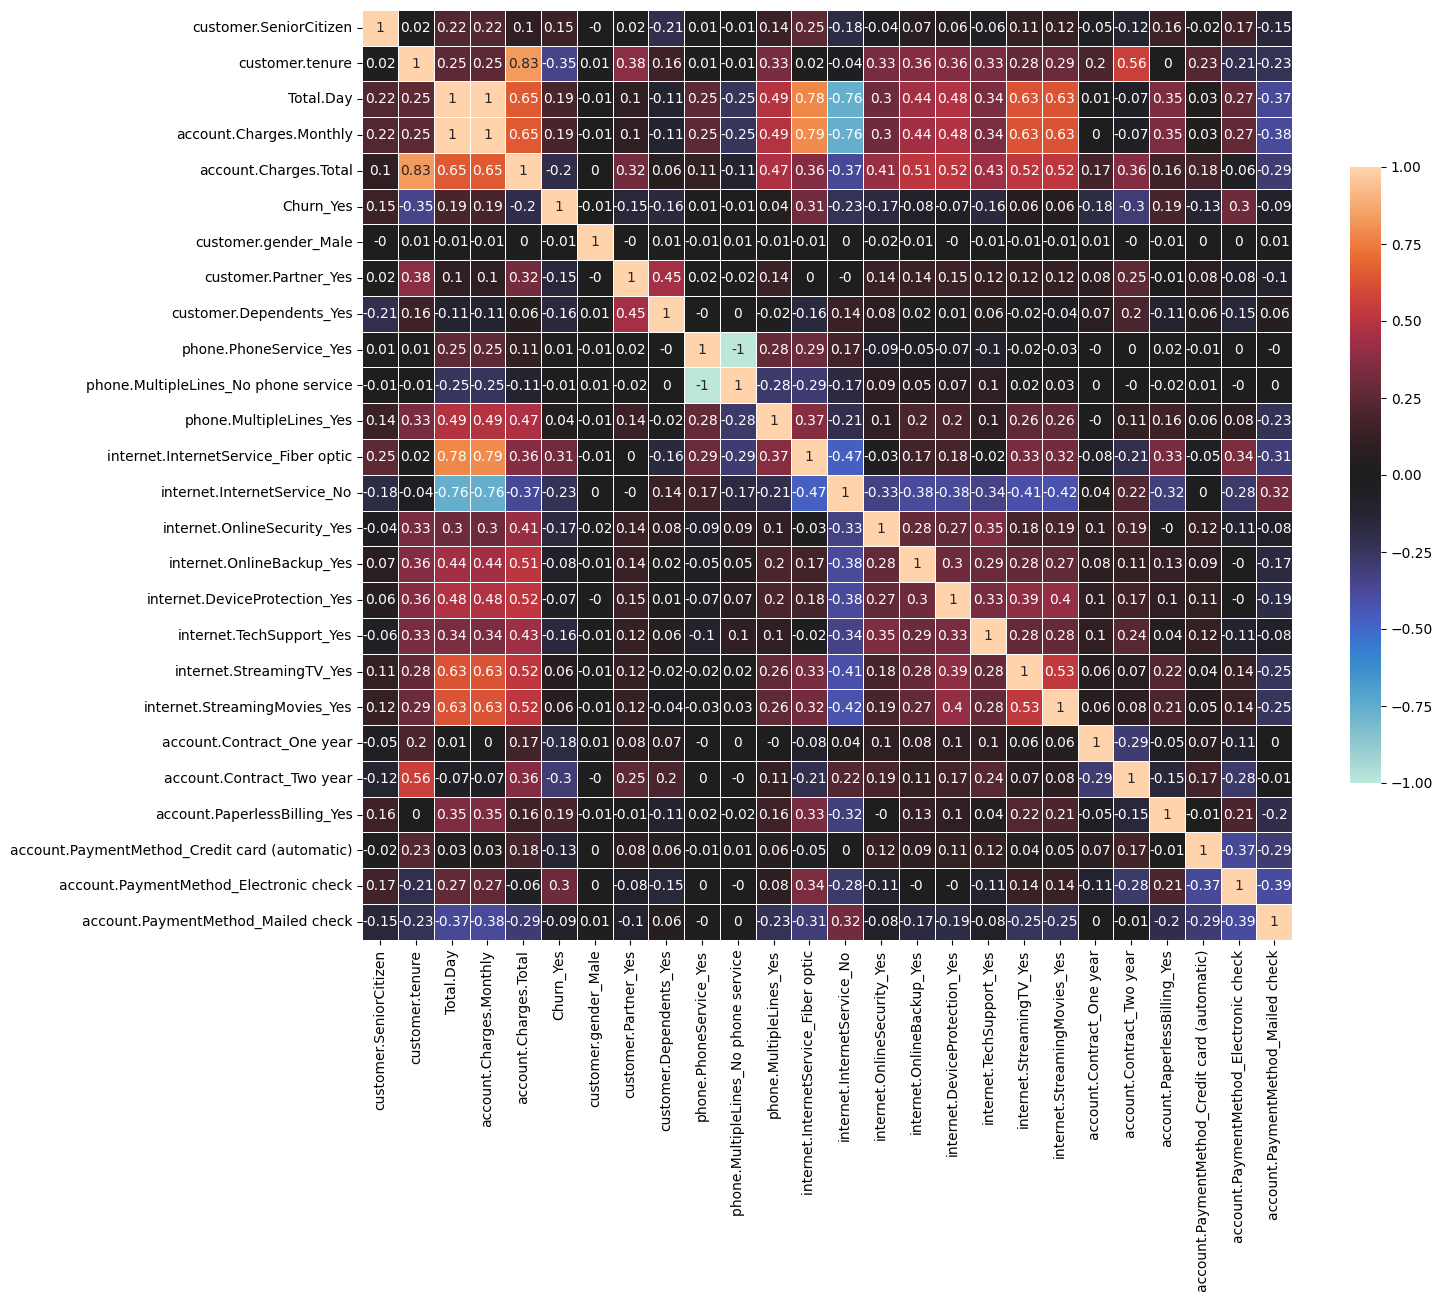

In [91]:
corr = dataframe_codificado.corr()
fig, ax = plt.subplots(figsize=(15,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

# **Seleção das variáveis**

In [48]:
limiar = 0.1
selec = [col for col, val in corr.abs().items() if val > limiar and col != 'Churn_Yes']

print(f"As Selecionadas foram quando (correlação > {limiar}):")
print(selec)

# Aplicar seleção em X
X = X[selec]
print("Shape de X :", X.shape)

As Selecionadas foram quando (correlação > 0.1):
['internet.InternetService_Fiber optic', 'account.PaymentMethod_Electronic check', 'account.Charges.Monthly', 'Total.Day', 'account.PaperlessBilling_Yes', 'customer.SeniorCitizen', 'account.PaymentMethod_Credit card (automatic)', 'customer.Partner_Yes', 'customer.Dependents_Yes', 'internet.TechSupport_Yes', 'internet.OnlineSecurity_Yes', 'account.Contract_One year', 'account.Charges.Total', 'internet.InternetService_No', 'account.Contract_Two year', 'customer.tenure']
Shape de X : (7032, 16)


# **Treino & Teste**

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print("Tamanho treino : ", X_train.shape)
print("Tamanho teste : ", X_test.shape)

Tamanho treino :  (4922, 16)
Tamanho teste :  (2110, 16)


## **Machine Learning**

In [67]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistica_ml = LogisticRegression(max_iter=2000, solver='lbfgs', random_state=40)
forest_ml = RandomForestClassifier(n_estimators=300, random_state=40)

logistica_ml.fit(X_train, y_train)
forest_ml.fit(X_train, y_train)

print("Machine Learning aplicada com sucesso!")

Machine Learning aplicada com sucesso!


# **Avaliação da ML**

In [68]:
def avalia_ml(modelo, X_test, y_test, nome):
    y_pred = modelo.predict(X_test)
    print(f"--- Avaliação do modelo: {nome} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, zero_division=0))
    print("Recall:", recall_score(y_test, y_pred, zero_division=0))
    print("F1-score:", f1_score(y_test, y_pred, zero_division=0))
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=0))

avalia_ml(logistica_ml, X_test, y_test, "Regressão Logística\n\n")
avalia_ml(forest_ml, X_test, y_test, "Random Forest\n\n")

--- Avaliação do modelo: Regressão Logística

 ---
Accuracy: 0.7971563981042654
Precision: 0.6357894736842106
Recall: 0.5421903052064632
F1-score: 0.5852713178294574
Matriz de Confusão:
 [[1380  173]
 [ 255  302]]
              precision    recall  f1-score   support

       False       0.84      0.89      0.87      1553
        True       0.64      0.54      0.59       557

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110

--- Avaliação do modelo: Random Forest

 ---
Accuracy: 0.7886255924170616
Precision: 0.6225165562913907
Recall: 0.5062836624775583
F1-score: 0.5584158415841585
Matriz de Confusão:
 [[1382  171]
 [ 275  282]]
              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1553
        True       0.62      0.51      0.56       557

    accuracy                           0.79      2110
   macro avg       0.73      0.70

# **Random Forest**

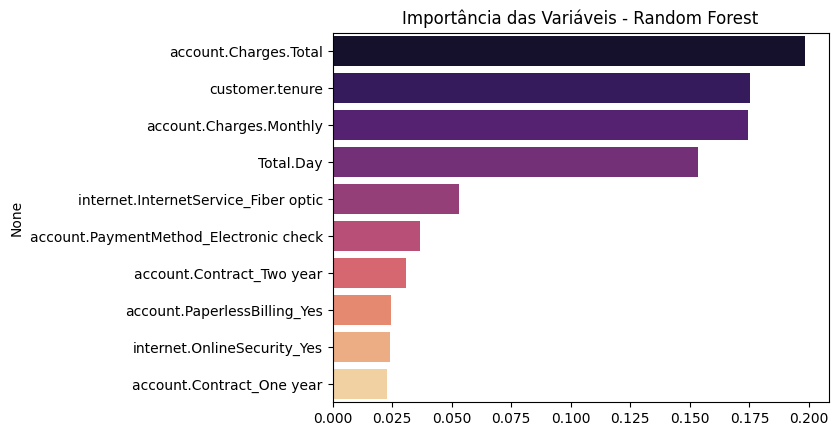

account.Charges.Total                     0.198273
customer.tenure                           0.175265
account.Charges.Monthly                   0.174197
Total.Day                                 0.153470
internet.InternetService_Fiber optic      0.053248
account.PaymentMethod_Electronic check    0.036905
account.Contract_Two year                 0.030866
account.PaperlessBilling_Yes              0.024361
internet.OnlineSecurity_Yes               0.024239
account.Contract_One year                 0.022949
dtype: float64


In [72]:
top = pd.Series(forest_ml.feature_importances_, index=X.columns).nlargest(10)
sns.barplot(x=top.values, y=top.index, hue=top.index, palette="magma", dodge=False, legend=False)
plt.title("Importância das Variáveis - Random Forest")
plt.show()

print(top)


# **Conclusão**

In [74]:
conclusao = """
***
CONCLUSÃO
***

Usando Machine Learning (Regressão Logística e Random Forest), existe a possibilidade de prever clientes que tenham probabilidade de churn na Telecom X.

Fatores que elevam/diminuem o Churn:
- Contratos mensais ===> maior risco de churn.
- Baixo tempo de permanência.
- Alta cobrança mensal.
- Serviços adicionais aumentam retenção.

O que recomendar ?
- Incentivar contratos de longo prazo.
- Programas de fidelidade.
- Ajustar preços e pacotes com mais serviços.
- Beneficiar serviços extras.

Melhorias:
Reduzir a evasão, aumentar a satisfação dos clientes.
Clientes podem permanecer fiéis no médio e longo prazo.
============================================================
"""

print(conclusao)



***
CONCLUSÃO 
***

Usando Machine Learning (Regressão Logística e Random Forest), existe a possibilidade de prever clientes que tenham probabilidade de churn na Telecom X.

Fatores que elevam/diminuem o Churn:
- Contratos mensais ===> maior risco de churn.
- Baixo tempo de permanência.
- Alta cobrança mensal.
- Serviços adicionais aumentam retenção.

O que recomendar ?
- Incentivar contratos de longo prazo.
- Programas de fidelidade.
- Ajustar preços e pacotes com mais serviços.
- Beneficiar serviços extras.

Melhorias:
Reduzir a evasão, aumentar a satisfação dos clientes.
Clientes podem permanecer fiéis no médio e longo prazo.

